<a href="https://colab.research.google.com/github/akinbeduk/akinbeduk/blob/main/Veri_Biliminde_Olas%C4%B1l%C4%B1k_ve_%C4%B0statistik_%C3%96dev_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Veri Tanıtımı

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df= pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df = df.iloc[:,[0,1,2,3,4,5,6,7]]
df0 = df.copy()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.year = df.year.astype("str")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   object
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(2), object(6)
memory usage: 271.4+ KB


In [6]:
import sweetviz
my_report=sweetviz.analyze([df,"df"])
my_report.show_html("df1.html")

                                             |          | [  0%]   00:00 -> (? left)

Report df1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.describe()

,km_driven,selling_price
count,4340.000000,4.340000e+03
mean,66215.777419,5.041273e+05
std,46644.102194,5.785487e+05
min,1.000000,2.000000e+04
25%,35000.000000,2.087498e+05
50%,60000.000000,3.500000e+05
75%,90000.000000,6.000000e+05
max,806599.000000,8.900000e+06


In [8]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [9]:
df.drop_duplicates(inplace=True)

# 2. Price Verisi Dağılımları

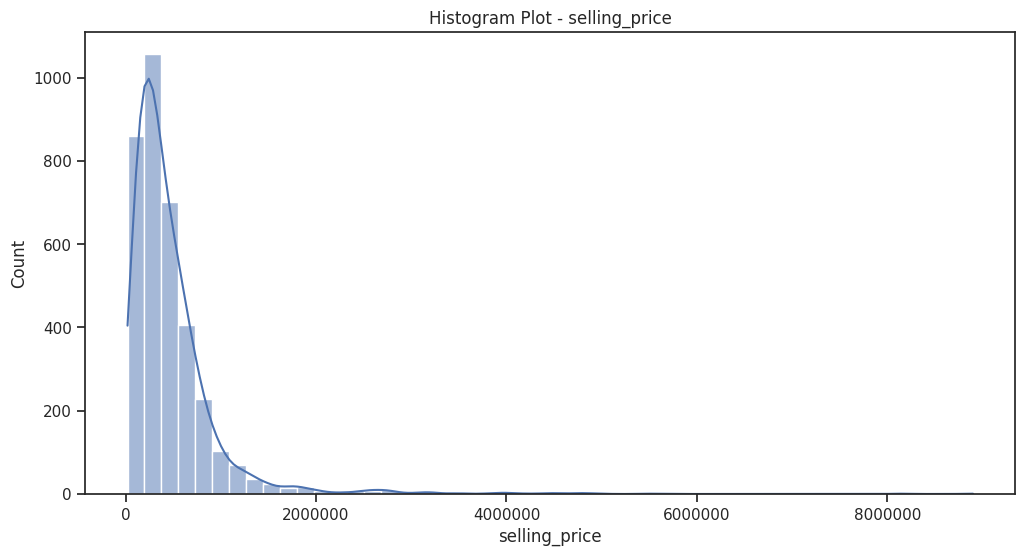

In [14]:
sns.set(style="ticks")
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='selling_price', bins=50, kde=True)
plt.title('Histogram Plot - selling_price')
plt.show()

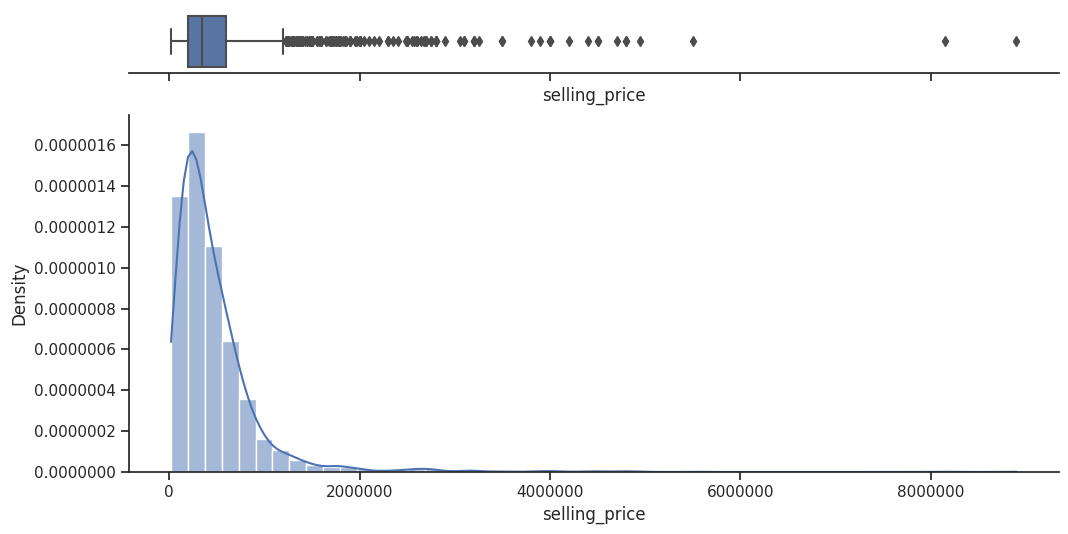

In [15]:

# Subplotları oluşturun
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12, 6))

# Boxplot
sns.boxplot(x=df.selling_price, ax=ax_box)
ax_box.set(yticks=[])

# Histogram plot
sns.histplot(x=df.selling_price, bins=50, kde=True, stat='density', ax=ax_hist)

# Stilleri uygula
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

# Görseli göster
plt.show()


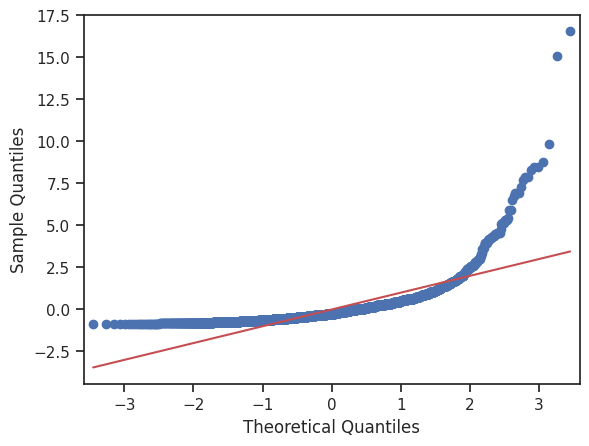

In [16]:
sm.qqplot(df['selling_price'], line='s',fit=True)
plt.show()

# 2. Price Verisine Yönelik Uyum İyiliği Testleri

## Ampirik Dağılım Fonksiyonuna Dayalı Testler

**Kolmogorov-Smirnov testi için p değeri (0.0):**

P-değeri ≤ 0.05: Null hipotezi reddedilir. Veri seti belirli bir teorik dağılıma uymaz.

In [17]:
from scipy.stats import kstest

# Kolmogorov-Smirnov Test
ks_istatistik, ks_p_degeri = kstest(df['selling_price'], 'norm')
print(f"P-değeri: {ks_p_degeri}\n")

P-değeri: 0.0



**Anderson-Darling testi için Test İstatistiği (276.54):**

 Bu değer, veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar yüksekse, uyumsuzluk o kadar belirgindir.

In [19]:
from scipy.stats import anderson

# Anderson-Darling Test
ad_istatistik, ad_kritik_degerler, ad_p_degeri = anderson(df['selling_price'], 'norm')
print(f"Anderson-Darling Test İstatistiği: {ad_istatistik}")
print(f"Kritik Değerler: {ad_kritik_degerler}")
print(f"P-değeri: {ad_p_degeri}\n")


Anderson-Darling Test İstatistiği: 276.5461431957883
Kritik Değerler: [0.575 0.655 0.786 0.917 1.091]
P-değeri: [15.  10.   5.   2.5  1. ]



**Cramer-Von Mises testi için p değeri (0):**

Bu değer de veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar sıfıra yakınsa, uyumsuzluk o kadar belirgindir.

In [22]:
from scipy.stats import cramervonmises

rng = np.random.default_rng()
x = stats.norm.rvs(size=500, random_state=rng)
cv_test = cramervonmises(df['selling_price'], 'norm')

# Test istatistiği ve p-değeri
print(f"Cramer-Von Mises Test İstatistiği: {cv_test.statistic}")
print(f"P-değeri: {cv_test.pvalue}\n")

Cramer-Von Mises Test İstatistiği: 1192.3333333333333
P-değeri: 0



### Regresyon ve Korelasyona Dayalı Testler:

**Shapiro-Wilk Test İstatistiği p değeri (0.0):**

Bu değer de veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar sıfıra yakınsa, uyumsuzluk o kadar belirgindir.

In [23]:
from scipy.stats import shapiro

istatistik, p_degeri = shapiro(df['selling_price'])

# Test istatistiği ve p-değeri
print(f"Shapiro-Wilk Test İstatistiği: {istatistik}")
print(f"P-değeri: {p_degeri:.15f}")

if p_degeri < 0.05:
    print("Veri seti normal dağılıma uymamaktadır.")
else:
    print("Veri seti normal dağılıma uymaktadır.")


Shapiro-Wilk Test İstatistiği: 0.6041891574859619
P-değeri: 0.000000000000000
Veri seti normal dağılıma uymamaktadır.


# 3. Price Verisi Normalleştirme Dönüşümleri

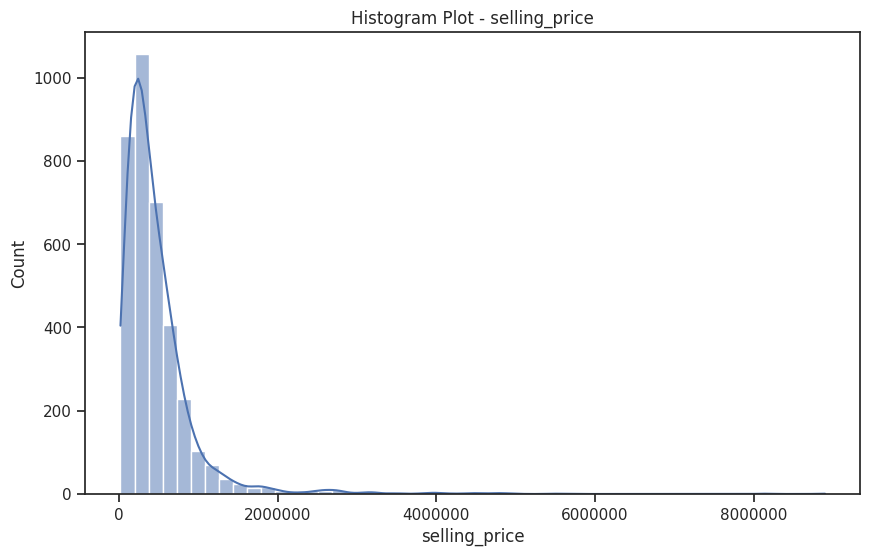

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='selling_price', bins=50, kde=True)
plt.title('Histogram Plot - selling_price')
plt.show()

## I. V^0.5 (Karekök Dönüşümü):

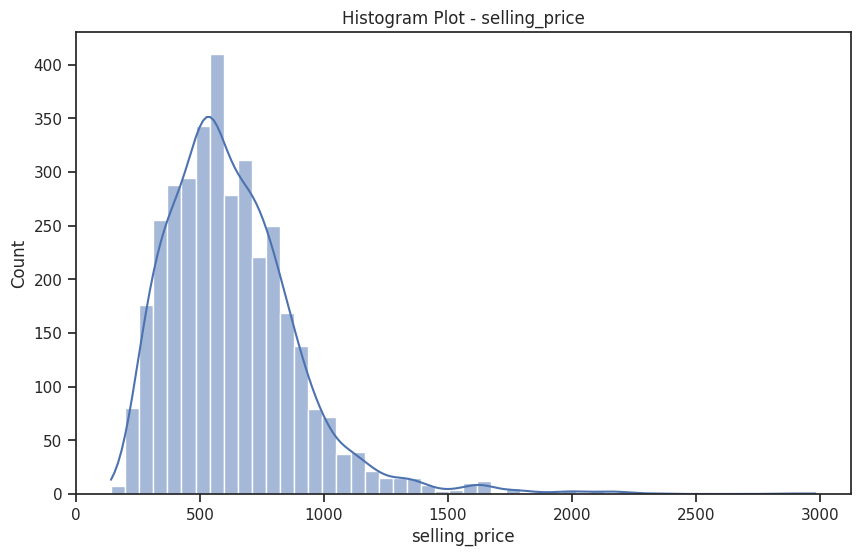

In [25]:
veri_karekok = np.sqrt(df.selling_price)
plt.figure(figsize=(10, 6))
sns.histplot(data=veri_karekok, bins=50, kde=True)
plt.title('Histogram Plot - selling_price')
plt.show()

## II. V^0.333 (Küpkök Dönüşümü):

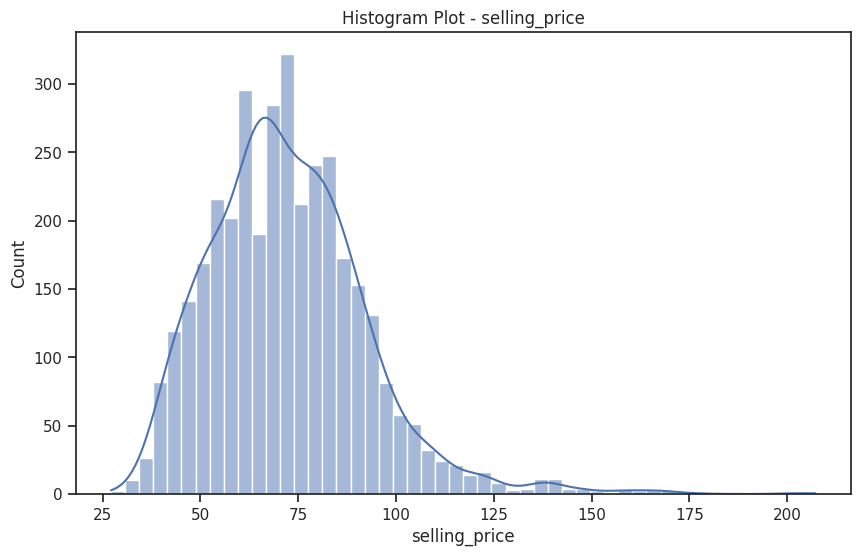

In [26]:
veri_kupkok = np.cbrt(df.selling_price)
plt.figure(figsize=(10, 6))
sns.histplot(data=veri_kupkok, bins=50, kde=True)
plt.title('Histogram Plot - selling_price')
plt.show()

## III. log10(V) (Logaritma Dönüşümü):

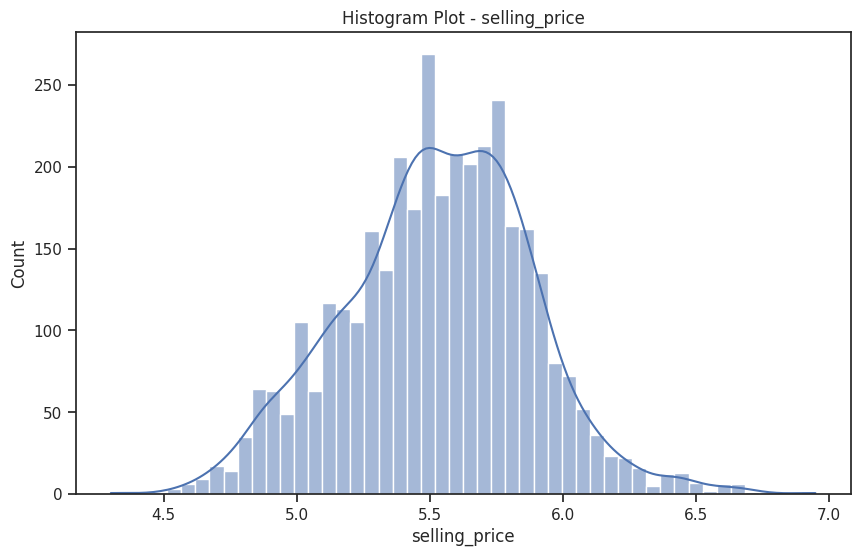

In [27]:
veri_log10 = np.log10(df.selling_price)
plt.figure(figsize=(10, 6))
sns.histplot(data=veri_log10, bins=50, kde=True)
plt.title('Histogram Plot - selling_price')
plt.show()

## IV. V^(-1) (Ters Dönüşüm):

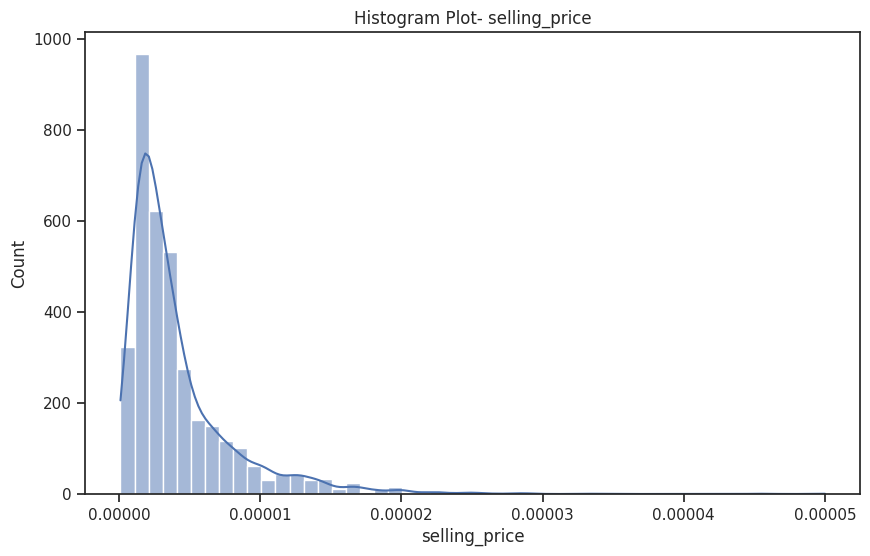

In [28]:
veri_ters = 1 / df.selling_price
plt.figure(figsize=(10, 6))
sns.histplot(data=veri_ters, bins=50, kde=True)
plt.title('Histogram Plot- selling_price')
plt.show()

## V. Sonuç

**Log dönüşümünün en uygun olduğu değerlendirilmiştir.**

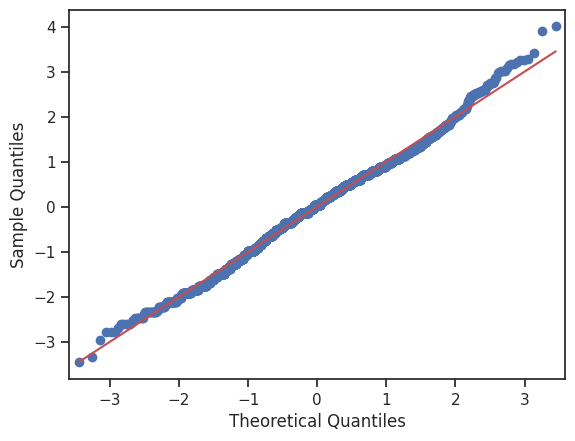

In [29]:
sm.qqplot(veri_log10, line='s',fit=True)
plt.show()

# 4. Log Dönüşümü Yapıldıktan Sonra Price Verisine Yönelik Uyum İyiliği Testleri

## Ampirik Dağılım Fonksiyonuna Dayalı Testler

**Kolmogorov-Smirnov testi için p değeri (0.0):**

P-değeri ≤ 0.05: Null hipotezi reddedilir. Veri seti belirli bir teorik dağılıma uymaz.

In [39]:
from scipy.stats import kstest

# Kolmogorov-Smirnov Test
try:
    ks_statistic, ks_p_value = kstest(veri_log10, 'norm')
except FloatingPointError:
    ks_p_value = 0

print(f"P-value: {ks_p_value}\n")

P-value: 0



**Anderson-Darling testi için Test İstatistiği (5.52):**

 Bu değer, veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar yüksekse, uyumsuzluk o kadar belirgindir.

In [40]:
from scipy.stats import anderson

# Anderson-Darling Test
ad_istatistik, ad_kritik_degerler, ad_p_degeri = anderson(veri_log10, 'norm')
print(f"Anderson-Darling Test İstatistiği: {ad_istatistik}")
print(f"Kritik Değerler: {ad_kritik_degerler}")
print(f"P-değeri: {ad_p_degeri}\n")


Anderson-Darling Test İstatistiği: 5.525712024683344
Kritik Değerler: [0.575 0.655 0.786 0.917 1.091]
P-değeri: [15.  10.   5.   2.5  1. ]



**Cramer-Von Mises testi için p değeri (2.46e-07):**

Bu değer de veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar sıfıra yakınsa, uyumsuzluk o kadar belirgindir.

In [41]:
import numpy as np
from scipy import stats
rng = np.random.default_rng()
x = stats.norm.rvs(size=500, random_state=rng)
cv_test = cramervonmises(veri_log10, 'norm')

# Test istatistiği ve p-değeri
print(f"Cramer-Von Mises Test İstatistiği: {cv_test.statistic}")
print(f"P-değeri: {cv_test.pvalue}\n")

Cramer-Von Mises Test İstatistiği: 1192.3327389570159
P-değeri: 2.46487343757984e-07



### Regresyon ve Korelasyona Dayalı Testler:

**Shapiro-Wilk Test İstatistiği p değeri (0.0):**

Bu değer de veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar sıfıra yakınsa, uyumsuzluk o kadar belirgindir.

In [42]:
from scipy.stats import shapiro

istatistik, p_degeri = shapiro(veri_log10)

# Test istatistiği ve p-değeri
print(f"Shapiro-Wilk Test İstatistiği: {istatistik}")
print(f"P-değeri: {p_degeri:.15f}")

if p_degeri < 0.05:
    print("Veri seti normal dağılıma uymamaktadır.")
else:
    print("Veri seti normal dağılıma uymaktadır.")


Shapiro-Wilk Test İstatistiği: 0.9952269792556763
P-değeri: 0.000000002228551
Veri seti normal dağılıma uymamaktadır.


# 5. Km Verisi Dağılımları

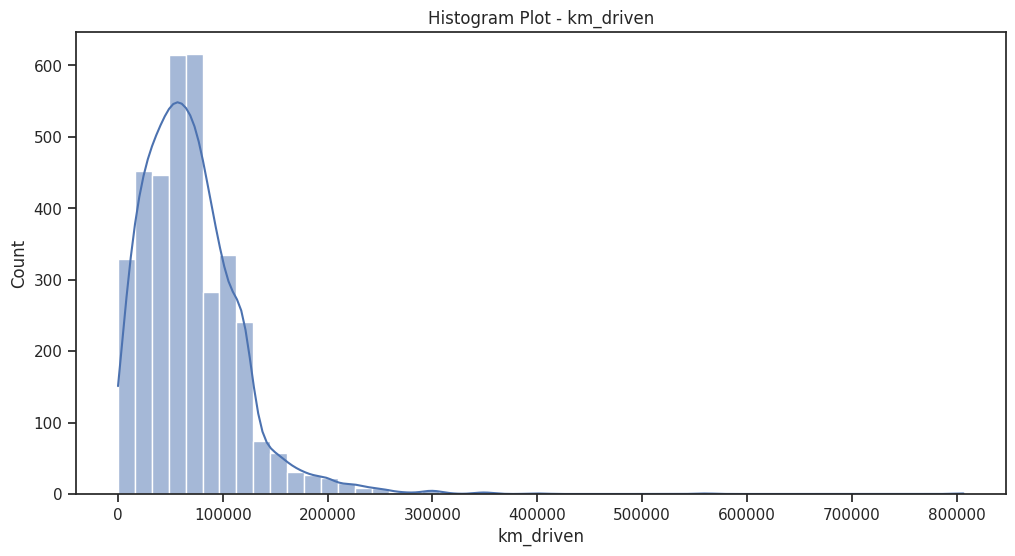

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='km_driven', bins=50, kde=True)
plt.title('Histogram Plot - km_driven')
plt.show()

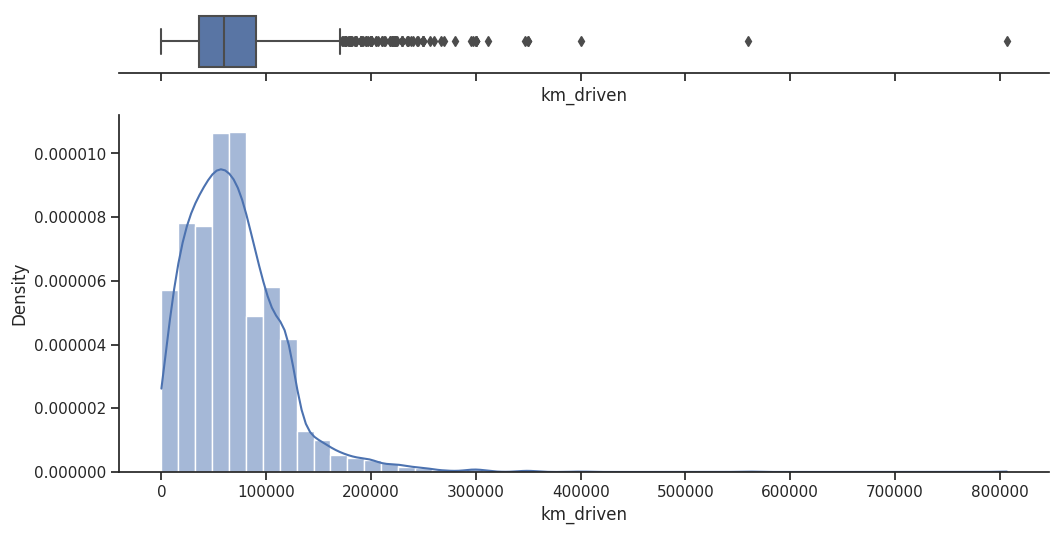

In [44]:
sns.set(style="ticks")

# Subplotları oluşturun
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12, 6))

# Boxplot
sns.boxplot(x=df.km_driven, ax=ax_box)
ax_box.set(yticks=[])

# Histogram plot
sns.histplot(x=df.km_driven, bins=50, kde=True, stat='density', ax=ax_hist)

# Stilleri uygula
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

# Görseli göster
plt.show()


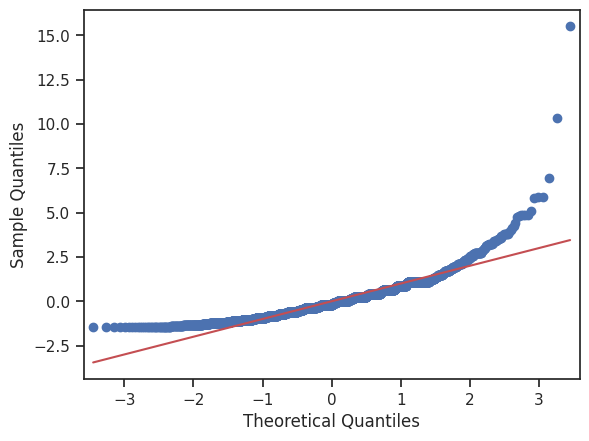

In [45]:
sm.qqplot(df['km_driven'], line='s',fit=True)
plt.show()

# 6. Km Verisine Yönelik Uyum İyiliği Testleri

## Ampirik Dağılım Fonksiyonuna Dayalı Testler

**Kolmogorov-Smirnov testi için p değeri (0.0):**

P-değeri ≤ 0.05: Null hipotezi reddedilir. Veri seti belirli bir teorik dağılıma uymaz.

In [51]:
from scipy.stats import kstest

# Kolmogorov-Smirnov Test
try:
    ks_statistic, ks_p_value = kstest(df['km_driven'], 'norm')
except FloatingPointError:
    ks_p_value = 0

print(f"P-value: {ks_p_value}\n")

P-value: 0



**Anderson-Darling testi için Test İstatistiği (54.8):**

 Bu değer, veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar yüksekse, uyumsuzluk o kadar belirgindir.

In [53]:
from scipy.stats import anderson

# Anderson-Darling Test
ad_istatistik, ad_kritik_degerler, ad_p_degeri = anderson(df['km_driven'], 'norm')
print(f"Anderson-Darling Test İstatistiği: {ad_istatistik}")
print(f"Kritik Değerler: {ad_kritik_degerler}")
print(f"P-değeri: {ad_p_degeri}\n")


Anderson-Darling Test İstatistiği: 54.892736540932674
Kritik Değerler: [0.575 0.655 0.786 0.917 1.091]
P-değeri: [15.  10.   5.   2.5  1. ]



**Cramer-Von Mises testi için p değeri (2.45e-07):**

Bu değer de veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar sıfıra yakınsa, uyumsuzluk o kadar belirgindir.

In [55]:
import numpy as np
from scipy import stats
rng = np.random.default_rng()
x = stats.norm.rvs(size=500, random_state=rng)
cv_test = cramervonmises(df['km_driven'], 'norm')

# Test istatistiği ve p-değeri
print(f"Cramer-Von Mises Test İstatistiği: {cv_test.statistic}")
print(f"P-değeri: {cv_test.pvalue}\n")

Cramer-Von Mises Test İstatistiği: 1192.041238669349
P-değeri: 2.4575716983665785e-07



### Regresyon ve Korelasyona Dayalı Testler:

**Shapiro-Wilk Test İstatistiği p değeri (0.0):**

Bu değer de veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar sıfıra yakınsa, uyumsuzluk o kadar belirgindir.

In [56]:
from scipy.stats import shapiro

istatistik, p_degeri = shapiro(df['km_driven'])

# Test istatistiği ve p-değeri
print(f"Shapiro-Wilk Test İstatistiği: {istatistik}")
print(f"P-değeri: {p_degeri:.15f}")

if p_degeri < 0.05:
    print("Veri seti normal dağılıma uymamaktadır.")
else:
    print("Veri seti normal dağılıma uymaktadır.")


Shapiro-Wilk Test İstatistiği: 0.8637399673461914
P-değeri: 0.000000000000000
Veri seti normal dağılıma uymamaktadır.


# 7. Km Verisi Normalleştirme Dönüşümleri

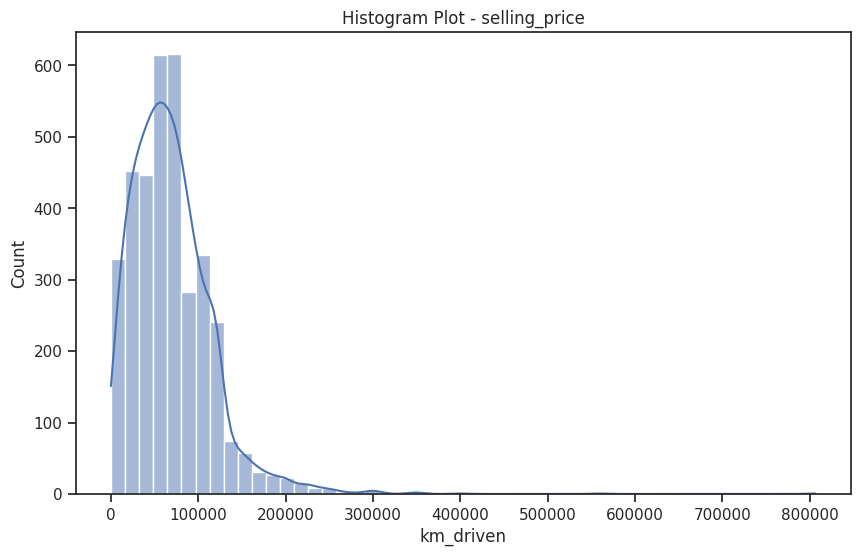

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='km_driven', bins=50, kde=True)
plt.title('Histogram Plot - selling_price')
plt.show()

## I. V^0.5 (Karekök Dönüşümü):

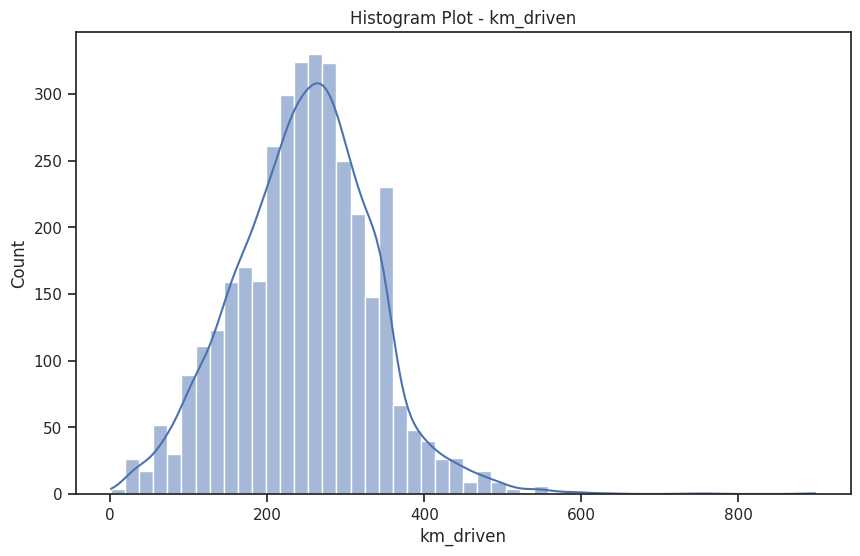

In [58]:
veri_karekok = np.sqrt(df.km_driven)
plt.figure(figsize=(10, 6))
sns.histplot(data=veri_karekok, bins=50, kde=True)
plt.title('Histogram Plot - km_driven')
plt.show()

## II. V^0.333 (Küpkök Dönüşümü):

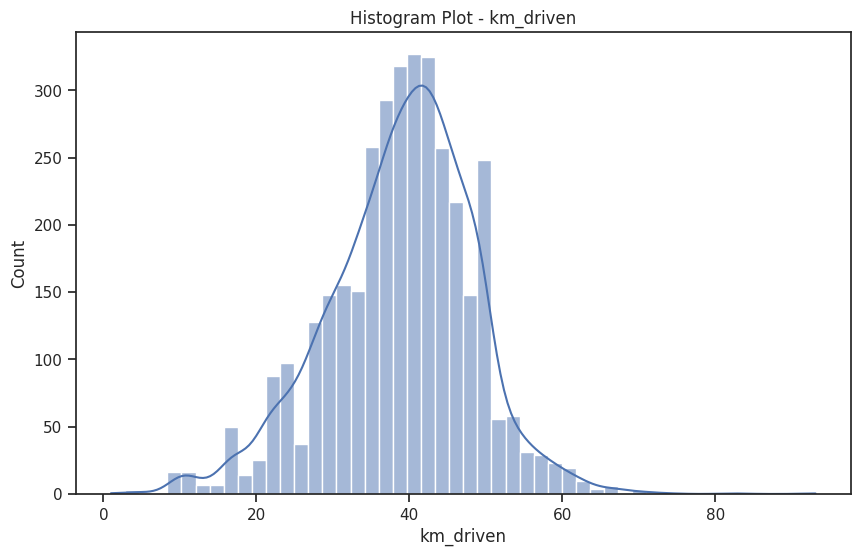

In [59]:
veri_kupkok = np.cbrt(df.km_driven)
plt.figure(figsize=(10, 6))
sns.histplot(data=veri_kupkok, bins=50, kde=True)
plt.title('Histogram Plot - km_driven')
plt.show()

## III. log10(V) (Logaritma Dönüşümü):

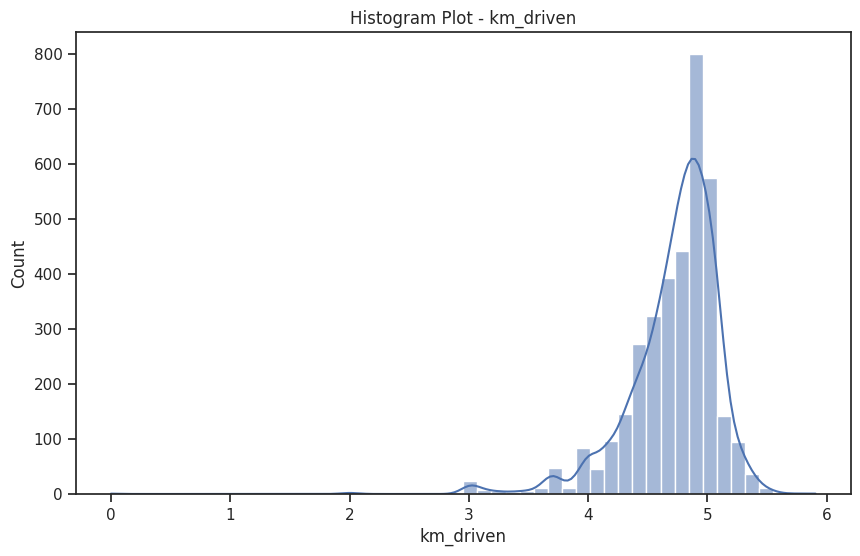

In [60]:
veri_log10 = np.log10(df.km_driven)
plt.figure(figsize=(10, 6))
sns.histplot(data=veri_log10, bins=50, kde=True)
plt.title('Histogram Plot - km_driven')
plt.show()

## IV. V^(-1) (Ters Dönüşüm):

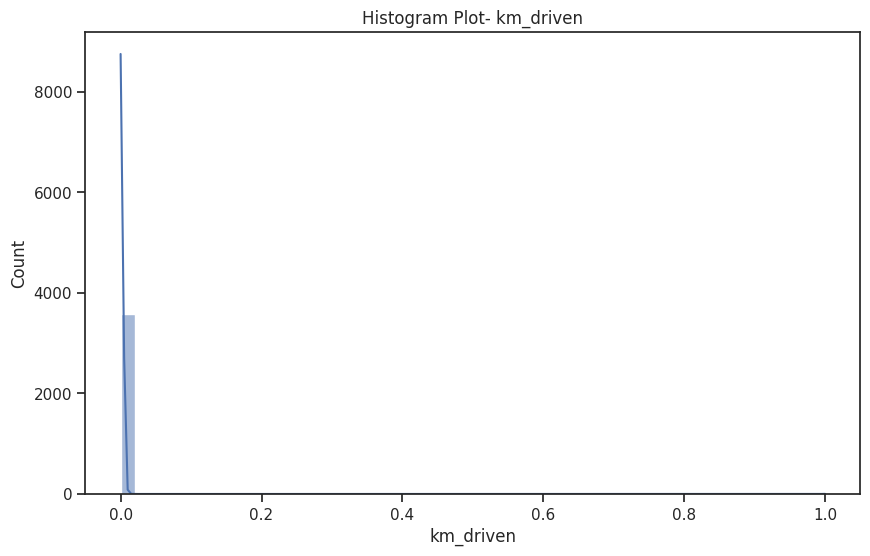

In [61]:
veri_ters = 1 / df.km_driven
plt.figure(figsize=(10, 6))
sns.histplot(data=veri_ters, bins=50, kde=True)
plt.title('Histogram Plot- km_driven')
plt.show()

## V. Sonuç

**Küpkök dönüşümünün en uygun olduğu değerlendirilmiştir.**

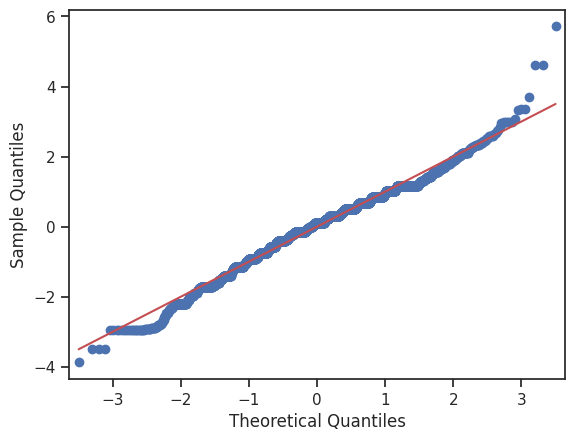

In [ ]:
sm.qqplot(veri_kupkok, line='s',fit=True)
plt.show()

# 8. Dönüşüm Yapıldıktan Sonra Km Verisine Yönelik Uyum İyiliği Testleri

## Ampirik Dağılım Fonksiyonuna Dayalı Testler

**Kolmogorov-Smirnov testi için p değeri (0.0):**

P-değeri ≤ 0.05: Null hipotezi reddedilir. Veri seti belirli bir teorik dağılıma uymaz.

In [62]:
from scipy.stats import kstest

# Kolmogorov-Smirnov Test
ks_istatistik, ks_p_degeri = kstest(veri_kupkok, 'norm')
print(f"P-değeri: {ks_p_degeri}\n")

P-değeri: 0.0



**Anderson-Darling testi için Test İstatistiği (16):**

 Bu değer, veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar yüksekse, uyumsuzluk o kadar belirgindir.

In [66]:
from scipy.stats import anderson

# Anderson-Darling Test
ad_istatistik, ad_kritik_degerler, ad_p_degeri = anderson(veri_kupkok, 'norm')
print(f"Anderson-Darling Test İstatistiği: {ad_istatistik}")
print(f"Kritik Değerler: {ad_kritik_degerler}")
print(f"P-değeri: {ad_p_degeri}\n")


Anderson-Darling Test İstatistiği: 16.04030040768157
Kritik Değerler: [0.575 0.655 0.786 0.917 1.091]
P-değeri: [15.  10.   5.   2.5  1. ]



**Cramer-Von Mises testi için p değeri (2.45e-07):**

Bu değer de veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar sıfıra yakınsa, uyumsuzluk o kadar belirgindir.

In [67]:
import numpy as np
from scipy import stats
rng = np.random.default_rng()
x = stats.norm.rvs(size=500, random_state=rng)
cv_test = cramervonmises(veri_kupkok, 'norm')

# Test istatistiği ve p-değeri
print(f"Cramer-Von Mises Test İstatistiği: {cv_test.statistic}")
print(f"P-değeri: {cv_test.pvalue}\n")

Cramer-Von Mises Test İstatistiği: 1192.0412290510146
P-değeri: 2.457571460778851e-07



### Regresyon ve Korelasyona Dayalı Testler:

**Shapiro-Wilk Test İstatistiği p değeri (0.0):**

Bu değer de veri setinin normal dağılıma ne kadar iyi uymadığını gösterir. Bu değer ne kadar sıfıra yakınsa, uyumsuzluk o kadar belirgindir.

In [65]:
from scipy.stats import shapiro

istatistik, p_degeri = shapiro(veri_log10)

# Test istatistiği ve p-değeri
print(f"Shapiro-Wilk Test İstatistiği: {istatistik}")
print(f"P-değeri: {p_degeri:.15f}")

if p_degeri < 0.05:
    print("Veri seti normal dağılıma uymamaktadır.")
else:
    print("Veri seti normal dağılıma uymaktadır.")


Shapiro-Wilk Test İstatistiği: 0.8723744750022888
P-değeri: 0.000000000000000
Veri seti normal dağılıma uymamaktadır.


## 9 . Sonuç

Sonuç olarak km ve price verileri için dönüşümler yapıldıktan sonra dahi normal dağılım elde edilememiştir.